## 基于贝叶斯决策理论的分类方法
**朴素贝叶斯是贝叶斯决策理论的一部分**
- 优点：在数据较少的情况下仍然有效，可以处理多类别问题
- 缺点：对于输入数据的准备方式较为敏感
- 适用数据类型：标称型数据

  *标称型：一般在有限的数据中取，而且只存在‘是’和‘否’两种不同的结果（一般用于分类）*
  *数值型：可以在无限的数据中取，而且数值比较具体化，例如4.02,6.23这种值（一般用于回归分析）*

#### **贝叶斯决策理论的核心思想，即选择具有最高概率的决策**
- 假设现在我们有一个数据集，它由两类数据组成，数据分布如图
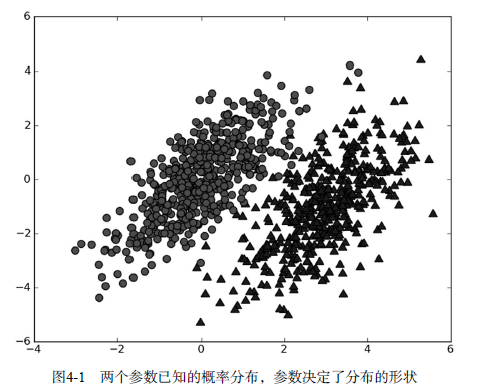
- 我们现在用p1(x,y)表示数据点(x,y)属于类别1（图中用圆点表示的类别）的概率，用p2(x,y)表示数据点(x,y)属于类别2（图中用三角形表示的类别）的概率，那么对于一个新数据点(x,y)，可以用下面的规则来判断它的类别：
 - 如果 p1(x,y) > p2(x,y)，那么类别为1
 - 如果 p2(x,y) > p1(x,y)，那么类别为2

- **计算分类的方法**
 - 使用kNN，进行1000次距离计算；
 - 使用决策树，分别沿x轴、y轴划分数据；
 - 计算数据点属于每个类别的概率，并进行比较

#### **条件概率**
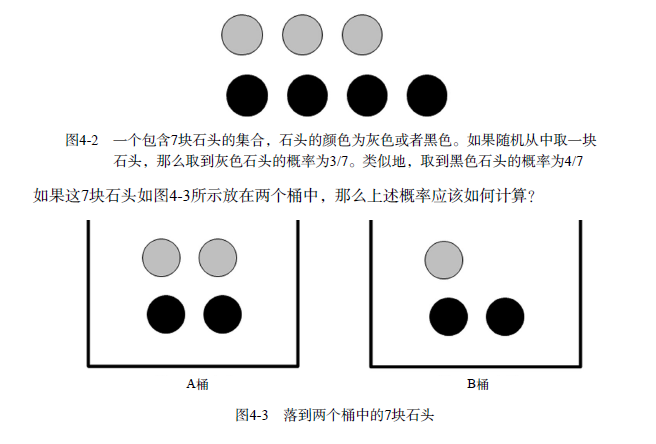
- 计算从B桶中取到灰色石头的概率的办法，这就是所谓的条件概率（conditionalprobability）。假定计算的是从B桶取到灰色石头的概率，这个概率可以记作P(gray|bucketB)，
- 我们称之为“在已知石头出自B桶的条件下，取出灰色石头的概率”。不难得到，P(gray|bucketA)值为2/4，P(gray|bucketB) 的值为1/3。
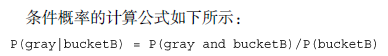

## **使用条件概率分类**
- 之前贝叶斯决策理论要求计算两个概率p1(x, y)和p2(x, y)：
 - 如果p1(x, y) > p2(x, y)，那么属于类别1；
 - 如果p2(x, y) > p1(x, y)，那么属于类别2。
 
- 使用p1( )和p2( )只是为了尽可能简化描述，真正需要计算和比较的是p(c1|x, y)和p(c2|x, y)。这些符号所代表的具体意义是：
 - 给定某个由x、y表示的数据点，那么该数据点来自类别c1的概率是多少？
 - 数据点来自类别c2的概率又是多少？
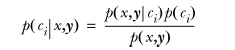
- 使用这些定义，可以定义贝叶斯分类准则为：
 - 如果P(c1|x, y) > P(c2|x, y)，那么属于类别c1。
 - 如果P(c1|x, y) < P(c2|x, y)，那么属于类别c2。

## **使用朴素贝叶斯进行文本分类**
- 朴素贝叶斯的一般过程
 - 收集数据：
 - 准备数据：需要数值型 或者布尔型数据
 - 分析数据：有大量特征时，绘制特征作用不大， 此时使用直方图效果更好
 - 训练算法：计算不同的独立特征的条件概率
 - 测试算法：计算错误率
 - 使用算法：一个常见的朴素贝叶斯应用是文档分类，可以任意的分类场景中使用朴素贝叶斯分类器

- 特征之间相互独立（independence）：指的是统计意义上的独立，即一个特征或者单词出现的可能性与它和其他单词相邻没有关系
- 每个特征同等重要

## **文本分类**

#### **准备数据：从文本中构建词向量**

In [20]:
import sys
import numpy as np
print(sys.executable)

/Users/gaozhiyong/Documents/pyenv/pyenv3.6/bin/python


In [2]:
def loadDataSet():
    postingList = [
        ['my','dog','has','flea','problems','help','please'],
        ['maybe','not','take','him','to','dog','park','stupid'],
        ['my','dalmation','is','so','cute','I','love','him'],
        ['stop','posting','stupid','worthless','garbage'],
        ['mr','licks','ate','my','steak','how','to','stop','him'],
        ['quit','buying','worthless','dog','food','stupid']
    ]
    classVec = [0,1,0,1,0,1]
    return postingList,classVec

In [3]:
def createVocabList(dataSet):
    vocabSet = set([])    #创建一个空集
    for document in dataSet:
#         print('document',document)
#         print("vocabSet之前",vocabSet)
        vocabSet = vocabSet | set(document)  #创建两个集合的并集
#         print("vocabSet之后",vocabSet)
    return list(vocabSet)

In [4]:
def setOfWord2Vec(vocabList,inputSet):
    returnVec = [0] * len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else:
            print("the word: %s is not in my Vocabulary!" % word )
    return returnVec

In [5]:
listOPosts,listClasses = loadDataSet()

In [6]:
listOPosts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [7]:
listClasses

[0, 1, 0, 1, 0, 1]

In [8]:
myVocabList = createVocabList(listOPosts)

In [9]:
myVocabList

['stop',
 'dalmation',
 'park',
 'please',
 'my',
 'to',
 'problems',
 'posting',
 'flea',
 'steak',
 'him',
 'take',
 'ate',
 'is',
 'help',
 'how',
 'cute',
 'has',
 'maybe',
 'food',
 'buying',
 'stupid',
 'licks',
 'mr',
 'dog',
 'not',
 'love',
 'worthless',
 'I',
 'so',
 'quit',
 'garbage']

In [10]:
listOPosts[0]

['my', 'dog', 'has', 'flea', 'problems', 'help', 'please']

In [11]:
setOfWord2Vec(myVocabList,listOPosts[0])

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
setOfWord2Vec(myVocabList,listOPosts[3])

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1]

#### **训练算法：从词向量计算概率**
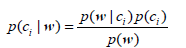
- 使用上述公式，对每个类计算该值，然后比较这两个概率值的大小。
- 如何计算呢？
 - 首先可以通过类别i（侮辱性留言或非侮辱性留言）中文档数除以总的文档数来计算概率p(ci)。
 - 接下来计算p(w|ci)，这里就要用到朴素贝叶斯假设。
   - 如果将w展开为一个个独立特征，那么就可以将上述概率写作p(w0,w1,w2..wN|ci)。
   - 这里假设所有词都互相独立，该假设也称作条件独立性假设，它意味着可以使p(w0|ci)p(w1|ci)p(w2|ci)...p(wN|ci)来计算上述概率

##### **代码逻辑**
- 计算每个类别中的文档数目
- 对每篇训练文档
 - 对每个类别
    - 如果词条出现在文档中 --- 增加该词条的计数值
    - 增加所有词条的计数值
 - 对每个类别
    - 对每个词条
       - 将 **该词条的数目** 除以 **总词数目** 得到 **条件概率**
 - 返回每个类别的条件概率

In [30]:
def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory) / float(numTrainDocs)
    p0Num = np.zeros(numWords) 
    p1Num = np.zeros(numWords)
    p0Denom = 0.0
    p1Denom = 0.0
    for i in range(numTrainDocs):
        try:
            if trainCategory[i] == 1:
                p1Num += trainMatrix[i]
                p1Denom += sum(trainMatrix[i])
            else:
                p0Num += trainMatrix[i]
                p0Denom += sum(trainMatrix[i])
        except:
            continue
    p1Vect = p1Num / p1Denom
    p0Vect = p0Num / p0Denom
    return p0Vect,p1Vect,pAbusive

In [15]:
listOPosts,listClasses = loadDataSet()

In [16]:
myVocabList = createVocabList(listOPosts)

In [35]:
trainMat = []
for postinDoc in listOPosts:
    trainMat.append(setOfWord2Vec(myVocabList,postinDoc))
p0V,p1V,pAb = trainNB0(trainMat,listClasses)

In [36]:
pAb

0.5

In [37]:
p0V

array([0.04166667, 0.04166667, 0.        , 0.04166667, 0.125     ,
       0.04166667, 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.08333333, 0.        , 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.        , 0.        ,
       0.        , 0.        , 0.04166667, 0.04166667, 0.04166667,
       0.        , 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.        , 0.        ])

In [38]:
p1V

array([0.05263158, 0.        , 0.05263158, 0.        , 0.        ,
       0.05263158, 0.        , 0.05263158, 0.        , 0.        ,
       0.05263158, 0.05263158, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05263158, 0.05263158,
       0.05263158, 0.15789474, 0.        , 0.        , 0.10526316,
       0.05263158, 0.        , 0.10526316, 0.        , 0.        ,
       0.05263158, 0.05263158])

#### **测试算法：根据现实情况修改分类器**

In [39]:
def trainNB1(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory) / float(numTrainDocs)
    p0Num = np.ones(numWords) 
    p1Num = np.ones(numWords)
    p0Denom = 2.0
    p1Denom = 2.0
    for i in range(numTrainDocs):
        try:
            if trainCategory[i] == 1:
                p1Num += trainMatrix[i]
                p1Denom += sum(trainMatrix[i])
            else:
                p0Num += trainMatrix[i]
                p0Denom += sum(trainMatrix[i])
        except:
            continue
    p1Vect = np.log(p1Num / p1Denom)
    p0Vect = np.log(p0Num / p0Denom)
    return p0Vect,p1Vect,pAbusive

In [43]:
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    p1=sum(vec2Classify * p1Vec) + np.log(pClass1)
    p0= sum(vec2Classify * p0Vec) + np.log(1.0- pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [45]:
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat = []
    for postinDoc in listOPosts:
        trainMat.append(setOfWord2Vec(myVocabList,postinDoc))
    p0V,p1V,pAb = trainNB1(np.array(trainMat), np.array(listClasses))
    testEntry1 = ['love','my','dalmation']
    thisDoc = np.array(setOfWord2Vec(myVocabList,testEntry1))
    print(testEntry1,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))
    
    testEntry2 = ['stupid','garbage']
    thisDoc = np.array(setOfWord2Vec(myVocabList,testEntry2))
    print(testEntry2,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))

In [46]:
testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


#### **准备数据：文档词袋模型**
- 将每个词的出现与否作为一个特征，这可以被描述为词集模型(set-of-words model)。
- 如果一个词在文档中出现不止一次，这可能意味着包含该词是否出现在文档中所不能表 达的某种信息，这种方法被称为词袋模型(bag-of-words model)

In [47]:
def bagOfWords2VecMN(vocabList,inputSet):
    returnVec = [0] * len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index[word]] += 1
    return returnVec